In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
#from sklearn.mixture import GaussianMixture

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',500)
df= pd.read_csv('C:/Users/User/Documents/Multivariado/menu.csv')

In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
df.corr()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,0.712309,...,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.904588,1.000000,0.999663,0.999725,0.847008,0.849592,0.433686,0.682161,0.681607,0.846624,...,0.461672,0.461463,0.581274,0.575621,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.904409,0.999663,1.000000,0.999765,0.846707,0.849293,0.431453,0.680547,0.680000,0.846158,...,0.461213,0.461005,0.580837,0.575206,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Total Fat (% Daily Value),0.904123,0.999725,0.999765,1.000000,0.847379,0.849973,0.433016,0.680940,0.680378,0.846728,...,0.460516,0.460298,0.580592,0.575033,-0.115761,0.807922,0.054038,-0.089353,0.162031,0.735478
Saturated Fat,0.845564,0.847008,0.846707,0.847379,1.000000,0.999279,0.620611,0.631210,0.630334,0.584075,...,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.847631,0.849592,0.849293,0.849973,0.999279,1.000000,0.620210,0.633603,0.632712,0.588694,...,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.522441,0.433686,0.431453,0.433016,0.620611,0.620210,1.000000,0.253935,0.251502,0.187580,...,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.596399,0.682161,0.680547,0.680940,0.631210,0.633603,0.253935,1.000000,0.999855,0.624362,...,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.595208,0.681607,0.680000,0.680378,0.630334,0.632712,0.251502,0.999855,1.000000,0.623320,...,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167
Sodium,0.712309,0.846624,0.846158,0.846728,0.584075,0.588694,0.187580,0.624362,0.623320,1.000000,...,0.200796,0.201032,0.694389,0.689995,-0.426536,0.869802,0.083068,-0.030769,-0.024074,0.871593


In [36]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
X=df[['Calories','Total Fat','Saturated Fat','Trans Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein']].copy()
scaler = StandardScaler()
scaler.fit(X)
Xs=scaler.transform(X)
pca= PCA()
pca.fit(Xs)
Xpca = pd.DataFrame(pca.transform(Xs),
        columns=['prin_'+str(i) for i in range(1,11)])

In [37]:
Xpca.head()

,prin_1,prin_2,prin_3,prin_4,prin_5,prin_6,prin_7,prin_8,prin_9,prin_10
0,0.923694,1.982405,-0.171750,-1.353272,1.651348,-0.536609,-0.100383,-0.036122,-0.029795,-0.021897
1,-0.231049,1.754981,-0.804623,0.779765,0.714809,0.031442,-0.200185,-0.266647,-0.026474,-0.046082
2,0.678096,1.631600,-0.445916,0.306514,0.382217,1.009316,-0.194449,0.117058,0.132700,-0.026358
3,2.219252,2.015720,0.143441,-1.633926,1.144332,-0.013478,-0.387814,0.365928,0.060471,-0.011747
4,1.041406,1.757602,-0.499918,0.469900,0.222344,0.604367,-0.428763,0.116790,0.061295,-0.035844


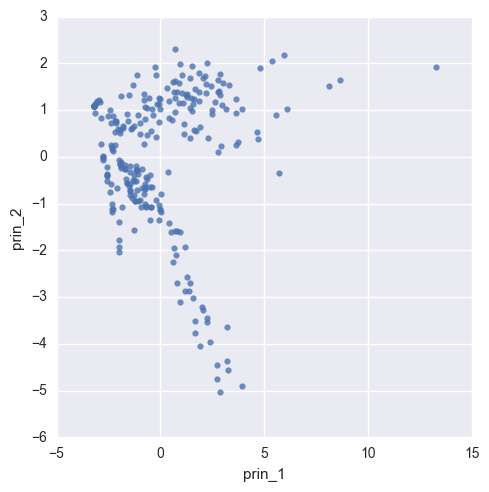

In [38]:
sns.lmplot(data=Xpca, x='prin_1',y='prin_2', fit_reg=False)

In [39]:
pca.explained_variance_ratio_.cumsum()

array([ 0.56133586,  0.78746565,  0.86455356,  0.92115845,  0.95648149,
        0.98236562,  0.99170772,  0.99807222,  0.99996945,  1.        ])

In [40]:
lst_inercia=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(X)
    lst_inercia.append(km.inertia_)

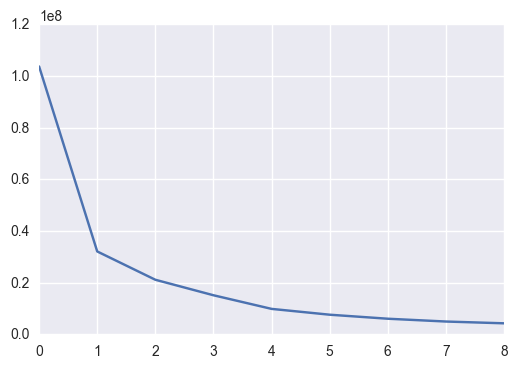

In [41]:
plt.plot(lst_inercia)

In [42]:
n=5
cl_j=AgglomerativeClustering(n_clusters=n)
cl_o=KMeans(n_clusters=n)
#cl_d=GaussianMixture(n_clusters=n)
lst_mod=[cl_o]#cl_d]
for i,mod in enumerate(lst_mod):
    mod.fit(Xs)
    Xpca['cluster_'+str(i)]=mod.predict(Xs)

In [43]:
Xpca.head()

,prin_1,prin_2,prin_3,prin_4,prin_5,prin_6,prin_7,prin_8,prin_9,prin_10,cluster_0
0,0.923694,1.982405,-0.171750,-1.353272,1.651348,-0.536609,-0.100383,-0.036122,-0.029795,-0.021897,1
1,-0.231049,1.754981,-0.804623,0.779765,0.714809,0.031442,-0.200185,-0.266647,-0.026474,-0.046082,1
2,0.678096,1.631600,-0.445916,0.306514,0.382217,1.009316,-0.194449,0.117058,0.132700,-0.026358,1
3,2.219252,2.015720,0.143441,-1.633926,1.144332,-0.013478,-0.387814,0.365928,0.060471,-0.011747,1
4,1.041406,1.757602,-0.499918,0.469900,0.222344,0.604367,-0.428763,0.116790,0.061295,-0.035844,1


([<matplotlib.patches.Wedge at 0x21f7f0bdbe0>,
  <matplotlib.text.Text at 0x21f7df7cef0>])

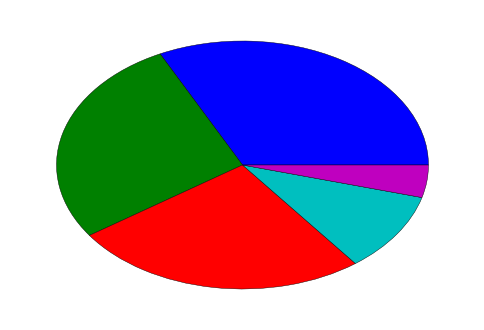

In [44]:
plt.pie(Xpca.cluster_0.value_counts())

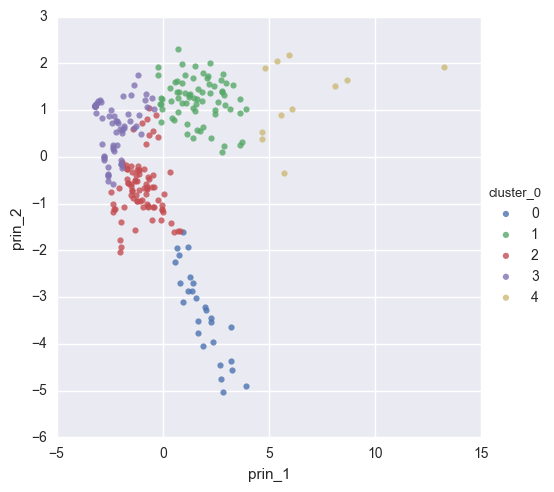

In [45]:
sns.lmplot(data=Xpca,x='prin_1',y='prin_2',hue='cluster_0',fit_reg=False)

In [46]:
Xpca['Item'],Xpca['Calories'],Xpca['Total Fat'],Xpca['Saturated Fat'],Xpca['Trans Fat'],Xpca['Cholesterol'],Xpca['Sodium'],Xpca['Carbohydrates'],Xpca['Dietary Fiber'],Xpca['Sugars'],Xpca['Protein'] = df['Item'],df['Calories'],df['Total Fat'],df['Saturated Fat'],df['Trans Fat'],df['Cholesterol'],df['Sodium'],df['Carbohydrates'],df['Dietary Fiber'],df['Sugars'],df['Protein']

In [48]:
Xpca[['cluster_0','Calories','Total Fat','Saturated Fat','Trans Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein']].groupby('cluster_0').mean()

,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
cluster_0,,,,,,,,,,
0,651.111111,22.148148,13.666667,0.962963,71.851852,226.111111,100.148148,0.777778,86.222222,13.444444
1,474.225352,23.619718,8.309859,0.253521,92.957746,1121.408451,42.549296,2.887324,7.070423,23.197183
2,307.023810,6.636905,3.708333,0.029762,20.119048,155.357143,53.714286,1.321429,46.571429,8.785714
3,118.358209,3.634328,1.619403,0.000000,10.671642,124.626866,17.731343,0.522388,11.955224,4.044776
4,980.000000,55.181818,16.636364,0.590909,303.636364,1979.090909,80.454545,4.727273,9.727273,40.818182


In [49]:
Xpca[['cluster_0','Calories','Total Fat','Saturated Fat','Trans Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein']].mean()

cluster_0          1.861538
Calories         368.269231
Total Fat         14.165385
Saturated Fat      6.007692
Trans Fat          0.203846
Cholesterol       54.942308
Sodium           495.750000
Carbohydrates     47.346154
Dietary Fiber      1.630769
Sugars            29.423077
Protein           13.338462
dtype: float64

In [56]:
Xpca.head(50)

,prin_1,prin_2,prin_3,prin_4,prin_5,prin_6,prin_7,prin_8,prin_9,prin_10,...,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
0,0.923694,1.982405,-0.171750,-1.353272,1.651348,-0.536609,-0.100383,-0.036122,-0.029795,-0.021897,...,300,13.0,5.0,0.0,260,750,31,4,3,17
1,-0.231049,1.754981,-0.804623,0.779765,0.714809,0.031442,-0.200185,-0.266647,-0.026474,-0.046082,...,250,8.0,3.0,0.0,25,770,30,4,3,18
2,0.678096,1.631600,-0.445916,0.306514,0.382217,1.009316,-0.194449,0.117058,0.132700,-0.026358,...,370,23.0,8.0,0.0,45,780,29,4,2,14
3,2.219252,2.015720,0.143441,-1.633926,1.144332,-0.013478,-0.387814,0.365928,0.060471,-0.011747,...,450,28.0,10.0,0.0,285,860,30,4,2,21
4,1.041406,1.757602,-0.499918,0.469900,0.222344,0.604367,-0.428763,0.116790,0.061295,-0.035844,...,400,23.0,8.0,0.0,50,880,30,4,2,21
5,2.783181,1.392850,1.482478,-0.440826,2.184594,-0.797838,0.027414,0.086159,0.103792,-0.006543,...,430,23.0,9.0,1.0,300,960,31,4,3,26
6,2.192627,1.560313,0.698739,-1.732183,-0.069743,0.025568,-0.167510,-0.516898,0.011231,-0.001476,...,460,26.0,13.0,0.0,250,1300,38,2,3,19
7,2.762922,1.650406,0.326104,-1.616868,0.148769,0.359340,-0.124089,-0.492994,0.099973,0.013816,...,520,30.0,14.0,0.0,250,1410,43,3,4,19
8,1.058689,1.361183,0.121384,0.230711,-0.883616,0.499173,-0.292978,-0.751821,-0.004085,0.017998,...,410,20.0,11.0,0.0,35,1300,36,2,3,20
9,1.672413,1.445709,-0.260137,0.342367,-0.690432,0.849558,-0.217178,-0.704190,0.096196,-0.009862,...,470,25.0,12.0,0.0,35,1420,42,3,4,20


In [55]:
pd.options.display.max_rows=999

In [60]:
pd.set_option('display.max_columns', None)
Xpca.head(60)

,prin_1,prin_2,prin_3,prin_4,prin_5,prin_6,prin_7,prin_8,prin_9,prin_10,cluster_0,Item,Calories,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
0,0.923694,1.982405,-0.171750,-1.353272,1.651348,-0.536609,-0.100383,-0.036122,-0.029795,-0.021897,1,Egg McMuffin,300,13.0,5.0,0.0,260,750,31,4,3,17
1,-0.231049,1.754981,-0.804623,0.779765,0.714809,0.031442,-0.200185,-0.266647,-0.026474,-0.046082,1,Egg White Delight,250,8.0,3.0,0.0,25,770,30,4,3,18
2,0.678096,1.631600,-0.445916,0.306514,0.382217,1.009316,-0.194449,0.117058,0.132700,-0.026358,1,Sausage McMuffin,370,23.0,8.0,0.0,45,780,29,4,2,14
3,2.219252,2.015720,0.143441,-1.633926,1.144332,-0.013478,-0.387814,0.365928,0.060471,-0.011747,1,Sausage McMuffin with Egg,450,28.0,10.0,0.0,285,860,30,4,2,21
4,1.041406,1.757602,-0.499918,0.469900,0.222344,0.604367,-0.428763,0.116790,0.061295,-0.035844,1,Sausage McMuffin with Egg Whites,400,23.0,8.0,0.0,50,880,30,4,2,21
5,2.783181,1.392850,1.482478,-0.440826,2.184594,-0.797838,0.027414,0.086159,0.103792,-0.006543,1,Steak & Egg McMuffin,430,23.0,9.0,1.0,300,960,31,4,3,26
6,2.192627,1.560313,0.698739,-1.732183,-0.069743,0.025568,-0.167510,-0.516898,0.011231,-0.001476,1,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",460,26.0,13.0,0.0,250,1300,38,2,3,19
7,2.762922,1.650406,0.326104,-1.616868,0.148769,0.359340,-0.124089,-0.492994,0.099973,0.013816,1,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",520,30.0,14.0,0.0,250,1410,43,3,4,19
8,1.058689,1.361183,0.121384,0.230711,-0.883616,0.499173,-0.292978,-0.751821,-0.004085,0.017998,1,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",410,20.0,11.0,0.0,35,1300,36,2,3,20
9,1.672413,1.445709,-0.260137,0.342367,-0.690432,0.849558,-0.217178,-0.704190,0.096196,-0.009862,1,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",470,25.0,12.0,0.0,35,1420,42,3,4,20
